## Ice Video Game Analysis

<p>In this project, we analyze a comprehensive dataset of video games sold globally to identify key factors that contribute to a game's success. By examining various attributes such as platform, genre, release year, and user and critic reviews, we aim to uncover patterns that can predict future hits. The insights gained will guide the planning of targeted advertising campaigns for the online store Ice, helping the company to focus its marketing efforts on the most promising games. The analysis focuses on data up to 2016, with the goal of forecasting trends and making data-driven decisions for the 2017 campaign.</p>

### Load Game Data

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Load the data files into different DataFrames
games_data = pd.read_csv('/datasets/games.csv')


In [3]:
# Print the general/summary information about the games DataFrame

print("Gamess Data Info")
print(games_data.info())

print("Games Data:")
games_data.head()

Gamess Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Games Data:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


There are missing values at Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating. Also Year_of_Release should be converted to int.

### Prepare the Data

In [5]:
# Ensure that all column names in the dataset are in lowercase for consistency.
games_data.columns = games_data.columns.str.lower()


In [6]:
# Check for duplicates
games_data.duplicated().sum()

0

No duplicates found.

In [7]:
# Check for duplicates based on 'Name', 'Year_of_Release', and 'Platform'
duplicate_entries = games_data.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)

# Display the duplicates
duplicates = games_data[duplicate_entries]
duplicates_count = duplicates.shape[0]

print(f"Number of Name-Year-Platform duplicates: {duplicates_count}")
duplicates.head()  # Display the first few duplicate rows


Number of Name-Year-Platform duplicates: 4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
# Sort the data to keep the rows with the highest total sales
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data_sorted = games_data.sort_values(by='total_sales', ascending=False)

# Drop duplicates based on 'name', 'year_of_release', and 'platform', keeping the one with the highest total sales
games_data_cleaned = games_data_sorted.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first')

# Drop the 'Total_Sales' column if it's no longer needed
games_data_cleaned = games_data_cleaned.drop(columns=['total_sales'])

# Display the cleaned data
print(f"Data shape after removing duplicates: {games_data_cleaned.shape}")
games_data_cleaned.head()


Data shape after removing duplicates: (16713, 11)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
games_data[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


These 2 rows are missing name and genre so it won't be useful in our analysis. Will remove them from our data.

In [10]:
# Dropping rows with missing 'name' or 'genre', as these are critical for analysis
games_data.dropna(subset=['name', 'genre'], inplace=True)


In [11]:
# Keep the missing 'year_of_release' as is
# Convert the non-missing 'year_of_release' values to integers
games_data['year_of_release'] = games_data['year_of_release'].apply(lambda x: int(x) if not pd.isna(x) else x)

games_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


For the year_of_release column, we've decided not to fill in the missing values with a median or any other imputed value. This decision is made to avoid potential inaccuracies that could arise from assigning an unrealistic year to certain games.

In [12]:
games_data[games_data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [13]:
games_data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [14]:
games_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.7       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [15]:
games_data['critic_score'].fillna(-1, inplace=True)


In [16]:
# Convert 'user_score' to numeric, replacing 'TBD' with NaN first, then filling with -1
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce').fillna(-1)


<p>Filling in the missing critic_score and user_score values with -1 to clearly distinguish between missing data and actual scores. By using -1, I ensure that these values are not mistakenly treated as low scores in my analysis.

Later, when analyzing the data, I can easily filter out or handle these -1 values separately, ensuring they don't skew the results.</p>

In [17]:
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [18]:
# Fill missing values in the 'rating' column with 'Not Rated'
games_data['rating'].fillna('Not Rated', inplace=True)


Filled in the missing rating with "Not Rated" to be more appropriate to avoid introducing bias.

In [19]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [20]:
# Create a new column that sums up the sales from all regions.
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [21]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Not Rated,31.38


Missing values in the critic_score, user_score, and rating columns could be due to several factors:

- Incomplete Data Collection:
    - Critic Score: Not all games receive reviews from critics, especially lesser-known or newly released games. As a result, the data might lack critic scores for these games.
    - User Score: Some games might not have enough user reviews, leading to missing user scores. This is particularly true for niche games or those that were not widely marketed.

- TBD (To Be Determined):

    - User Score: Some scores are marked as 'TBD' (To Be Determined). This typically occurs when the game has been released recently and is awaiting a sufficient number of reviews to calculate a meaningful score.

- ESRB Rating:

    - Some games might not have been submitted for an ESRB rating, or they may be unrated due to being released in regions where ESRB ratings are not mandatory.

#### Intermediate Conclusion

- What Has Been Done:
    - Data Loading and Initial Inspection: The dataset has been loaded, and we inspected its structure, noting missing values in critical columns such as critic_score, user_score, and rating.

- Data Cleaning:

    - Addressed missing values by filling critic_score and user_score with -1, a neutral placeholder that allows us to keep the rows for further analysis without skewing the results.

    - Replaced TBD values in the user_score column with -1 for consistency.

    - Missing values in the rating column were filled with "Not Rated" to indicate that these games do not have an official ESRB rating.

- Hypotheses About the Data:
1. Impact of Missing Scores: Games with missing critic and user scores may be less popular or less reviewed, potentially indicating lower sales or niche markets.

2. Platform Trends: We expect to see trends in platform sales, with older platforms fading out and newer ones emerging as market leaders.

3. Genre Popularity: Certain genres may dominate sales, potentially correlating with platform success.

- Next Steps:

1. Analyze Sales by Platform: We will examine how sales have varied across different platforms over time, identifying which platforms are growing or shrinking and the ones that might be most profitable in the future.

2. Impact of Reviews on Sales: We will analyze how user and critic reviews correlate with sales, particularly focusing on popular platforms.

### Analyze the Data

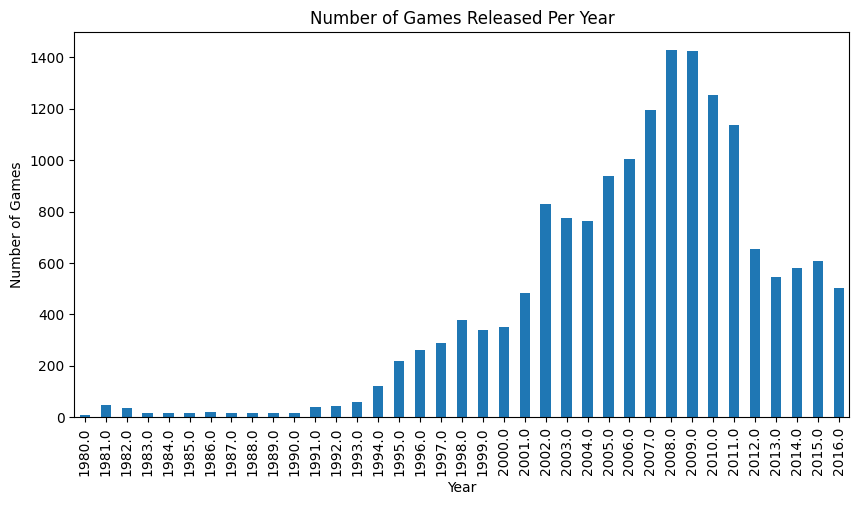

In [22]:
games_per_year = games_data['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

Lets focus on games released from 2000 and beyond.

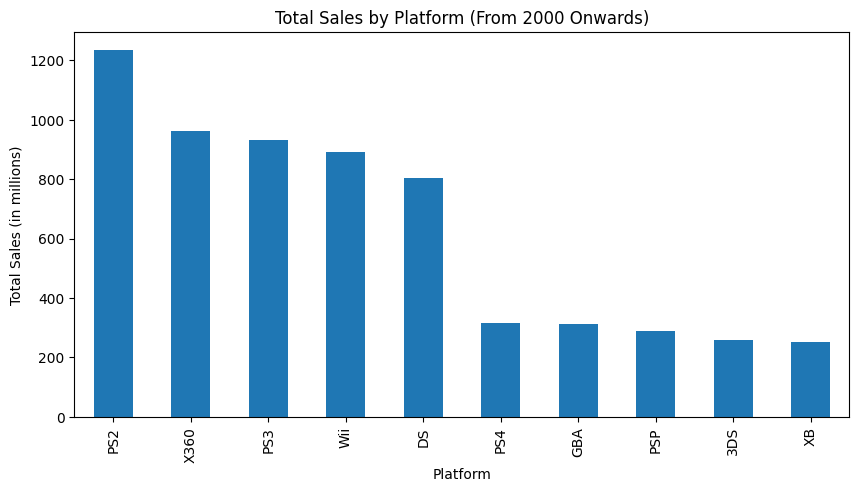

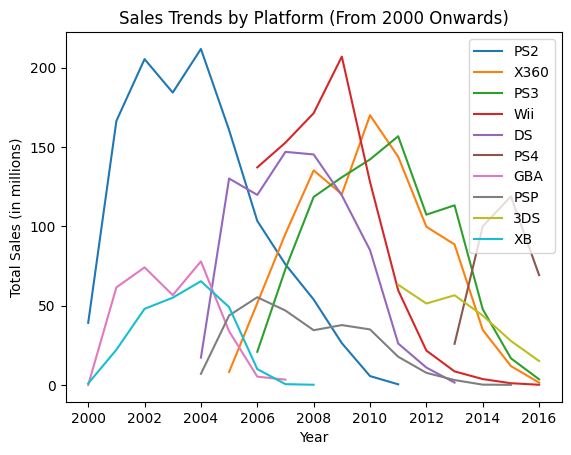

In [23]:
# Filter the data for years 2000 and higher
filtered_games_data = games_data[games_data['year_of_release'] >= 2000]

# Group the data by platform and calculate the total sales
top_platforms = filtered_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot the total sales by platform
top_platforms.plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Platform (From 2000 Onwards)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Plot sales trends for each top platform by year
for platform in top_platforms.index:
    platform_sales_per_year = filtered_games_data[filtered_games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    platform_sales_per_year.plot(label=platform)

plt.title('Sales Trends by Platform (From 2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.show()

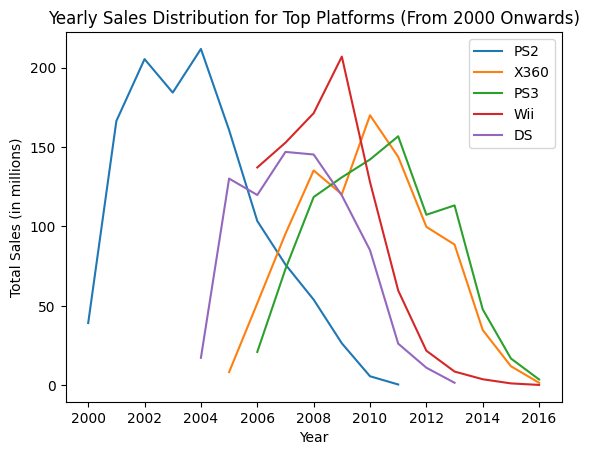

In [24]:
# Group data by platform and calculate total sales from the year 2000 onward
platform_sales = filtered_games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select platforms with the greatest total sales (e.g., top 5)
top_platforms = platform_sales.head(5).index

# Plot yearly distribution for these platforms
for platform in top_platforms:
    platform_sales_per_year = filtered_games_data[filtered_games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    platform_sales_per_year.plot(label=platform)

plt.title('Yearly Sales Distribution for Top Platforms (From 2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.show()


Top 5 platforms are PS2, X360, PS3, Wii and DS.

In [25]:
# Step 1: Identify platforms that had sales before 2015
platforms_before_2015 = filtered_games_data[filtered_games_data['year_of_release'] < 2015].groupby('platform')['total_sales'].sum()

# Step 2: Identify platforms with sales after 2015
platforms_after_2015 = filtered_games_data[filtered_games_data['year_of_release'] >= 2015].groupby('platform')['total_sales'].sum()

# Step 3: Find platforms that had sales before 2015 but zero sales after 2015
fading_platforms = platforms_before_2015.index.difference(platforms_after_2015[platforms_after_2015 > 0].index)

# Step 4: Find the last year these fading platforms had sales
last_sales_year = filtered_games_data[filtered_games_data['platform'].isin(fading_platforms)]
last_sales_year = last_sales_year.groupby('platform')['year_of_release'].max()

print("Platforms that used to be popular but now have zero sales and the last year they had sales:")
print(last_sales_year)





Platforms that used to be popular but now have zero sales and the last year they had sales:
platform
DC     2008.0
DS     2013.0
GB     2001.0
GBA    2007.0
GC     2007.0
N64    2002.0
PS     2003.0
PS2    2011.0
WS     2001.0
XB     2008.0
Name: year_of_release, dtype: float64


### Observation

- Platforms such as the WonderSwan (WS), Game Boy (GB), Game Boy Advance (GBA), and Nintendo 64 (N64) experienced their final sales as early as 2001 or 2007. This suggests a shift in consumer preferences or technological advancements that rendered these older platforms obsolete.

- The PlayStation 2 (PS2) and Xbox (XB), which ended sales in 2011 and 2008 respectively, highlight a gradual transition phase where newer generations of consoles began to dominate the market, while older platforms were phased out.

- Handheld devices such as the Nintendo DS (DS) and the Game Boy Advance (GBA) show a longer lifespan in the market, with the DS reaching its end in 2013, reflecting a more sustained consumer interest before a complete decline.

In [26]:
# Group by platform and calculate the first and last year of release for each platform
platform_lifespan = filtered_games_data.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calculate the lifespan of each platform
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Calculate the average lifespan of platforms
average_lifespan = platform_lifespan['lifespan'].mean()

# Display the platform lifespan and the average lifespan
platform_lifespan, average_lifespan


(             min     max  lifespan
 platform                          
 3DS       2011.0  2016.0       5.0
 DC        2000.0  2008.0       8.0
 DS        2004.0  2013.0       9.0
 GB        2000.0  2001.0       1.0
 GBA       2000.0  2007.0       7.0
 GC        2001.0  2007.0       6.0
 N64       2000.0  2002.0       2.0
 PC        2000.0  2016.0      16.0
 PS        2000.0  2003.0       3.0
 PS2       2000.0  2011.0      11.0
 PS3       2006.0  2016.0      10.0
 PS4       2013.0  2016.0       3.0
 PSP       2004.0  2015.0      11.0
 PSV       2011.0  2016.0       5.0
 WS        2000.0  2001.0       1.0
 Wii       2006.0  2016.0      10.0
 WiiU      2012.0  2016.0       4.0
 X360      2005.0  2016.0      11.0
 XB        2000.0  2008.0       8.0
 XOne      2013.0  2016.0       3.0,
 6.7)

In [27]:
# Filter data from 2010 onwards for relevant analysis
relevant_data = filtered_games_data[filtered_games_data['year_of_release'] >= 2013]


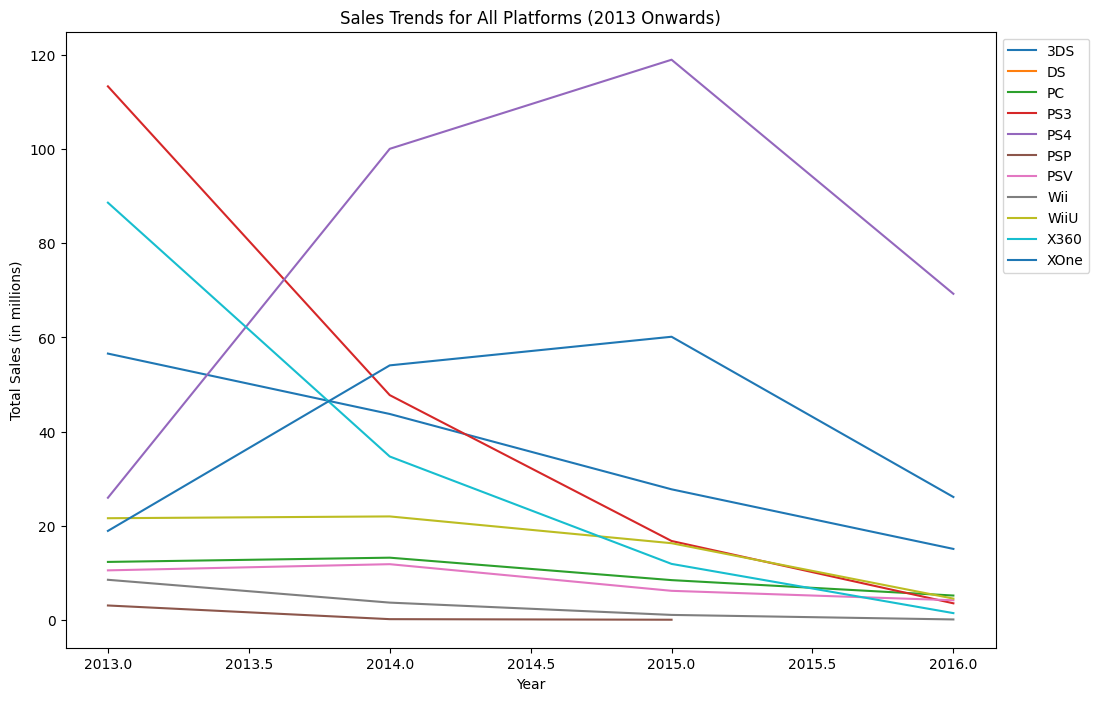

In [28]:
# Calculate total sales for each platform per year in the relevant period
platform_sales_trend = relevant_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Plot sales trends for all platforms in the relevant period to identify promising platforms
plt.figure(figsize=(12, 8))
for platform in platform_sales_trend.index:
    platform_sales_trend.loc[platform].plot(label=platform)

plt.title('Sales Trends for All Platforms (2013 Onwards)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



### Observation

- Market Transition: The market is clearly transitioning from older platforms like X360, PS3, and Wii to newer platforms like PS4 and XOne. This shift is typical as technology evolves and new consoles with better features and capabilities are introduced.

- Lifespan: Platforms generally show a strong presence for around 5-7 years before their sales start to decline significantly, suggesting this could be the average lifespan of a gaming console in terms of market dominance.

- Promising Platforms: For a marketing campaign in 2017, focusing on platforms like PS4 and XOne would be strategic, as they appear to be the current market leaders. However, the slight decline towards 2016 might suggest a need to monitor the market closely for emerging trends or new platforms.

In [29]:
# Reviewer's code 2

relevant_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


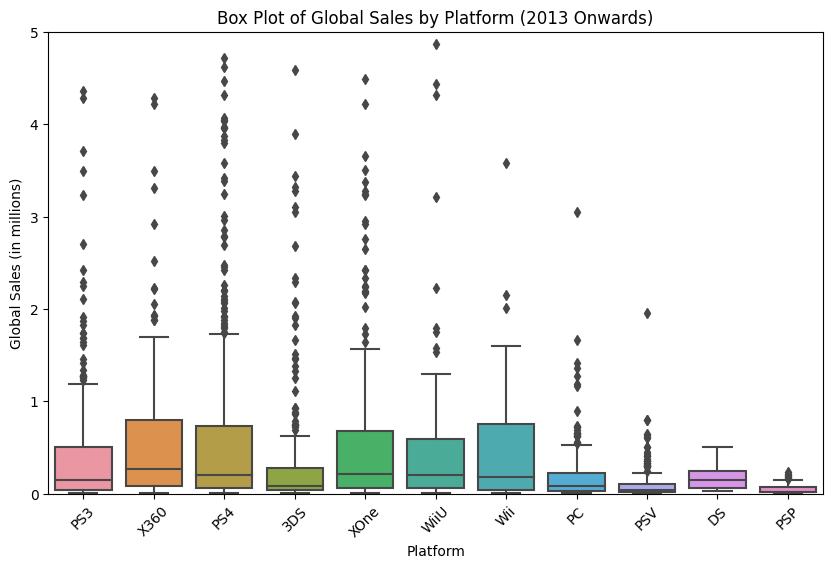

In [35]:
# Box plot for global sales by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.ylim(0, 5)
plt.title('Box Plot of Global Sales by Platform (2013 Onwards)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


### Observation

- The differences in sales across platforms are evident, with some platforms consistently performing better.

- Platforms like X360 and PS3 have higher average sales, as indicated by their higher medians and wider distribution of data.

- Platforms like PSP, PSV, and PS2 have lower average sales, suggesting less successful titles on these platforms during the given timeframe.

- The box plot shows that certain platforms (like X360, PS3, and PS4) have more successful titles, indicated by higher median sales and more outliers.

- Other platforms like PSP and PSV have lower sales figures overall.

**Outliers Analysis**

- Outliers in the data represent games that have significantly higher sales compared to the rest of the titles on the same platform. 

- Outliers often represent blockbuster games that have sold millions of copies, significantly boosting the platform's overall sales. These are crucial for understanding the platform's success.

- A platform with many outliers might be more attractive to both game developers and players, indicating a thriving ecosystem that supports successful titles.


**Promising Platforms**

- PS4 and XOne: These platforms continue to show strong sales and have several outliers, indicating they are likely to remain profitable in the near future. These platforms should be a focus for future game releases and marketing campaigns.

- PS3 and X360: While these platforms have historically high sales, their relevance is waning as newer consoles take over. However, they still hold a strong legacy, which could be leveraged for remakes or re-releases of classic games.

- PSV and PSP: These platforms show low sales and are unlikely to be profitable moving forward, making them less attractive for future game development.

Overall, PS4 and XOne appear to be the most promising platforms in the current market, while older platforms like PS3 and X360, though declining, still hold some value due to their strong historical performance.

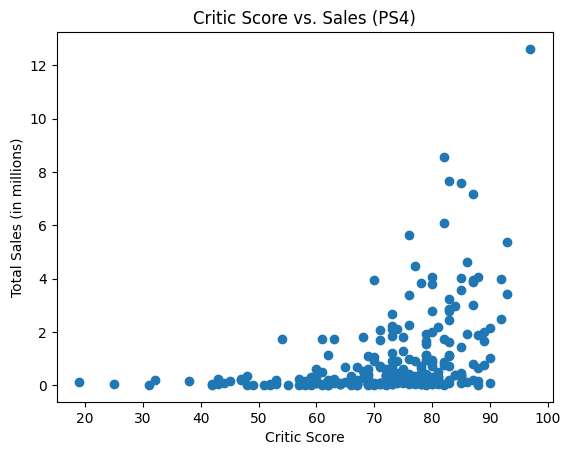

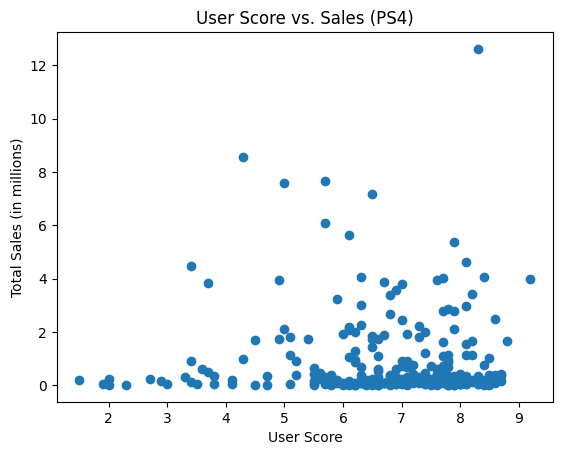

Correlation between Critic Score and Sales for PS4: 0.40656790206178095
Correlation between User Score and Sales for PS4: -0.031957110204556424


In [36]:
# Create a dataframe for Critic Score analysis (excluding rows with NaN critic scores)
critic_score_data = relevant_data[(relevant_data['platform'] == 'PS4') & 
                                  (relevant_data['critic_score'] != -1)]

# Create a dataframe for User Score analysis (excluding rows with NaN user scores)
user_score_data = relevant_data[(relevant_data['platform'] == 'PS4') & 
                                (relevant_data['user_score'] != -1)]

# Scatter plot for Critic Score vs. Sales
plt.scatter(critic_score_data['critic_score'], critic_score_data['total_sales'])
plt.title('Critic Score vs. Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Scatter plot for User Score vs. Sales
plt.scatter(user_score_data['user_score'], user_score_data['total_sales'])
plt.title('User Score vs. Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Calculate correlation for Critic Score
correlation_critic = critic_score_data['critic_score'].corr(critic_score_data['total_sales'])
print(f"Correlation between Critic Score and Sales for PS4: {correlation_critic}")

# Calculate correlation for User Score
correlation_user = user_score_data['user_score'].corr(user_score_data['total_sales'])
print(f"Correlation between User Score and Sales for PS4: {correlation_user}")


1. Critic Score vs. Sales (PS4):

- Shows a positive trend, indicating that higher critic scores tend to be associated with higher sales.
- The correlation coefficient is approximately 0.41. This suggests a moderate positive correlation, meaning that games with higher critic scores generally tend to sell better on the PS4 platform. However, this relationship isn't very strong, indicating other factors also influence sales.

2. User Score vs. Sales (PS4):

- There seems to be a lot of dispersion with no clear trend, indicating that user scores are not as strongly related to sales.
- The correlation coefficient is approximately -0.03, which is very close to zero. This indicates an almost negligible, slightly negative relationship between user scores and sales. In other words, user scores do not significantly impact sales on the PS4 platform.

#### Conclusions:

- Critic reviews have a noticeable impact on game sales, though the correlation is moderate. Higher critic scores tend to boost sales, but they aren't the only determinant.
- User reviews, however, do not have a significant impact on sales. The near-zero correlation indicates that the variability in user scores does not predict sales figures.

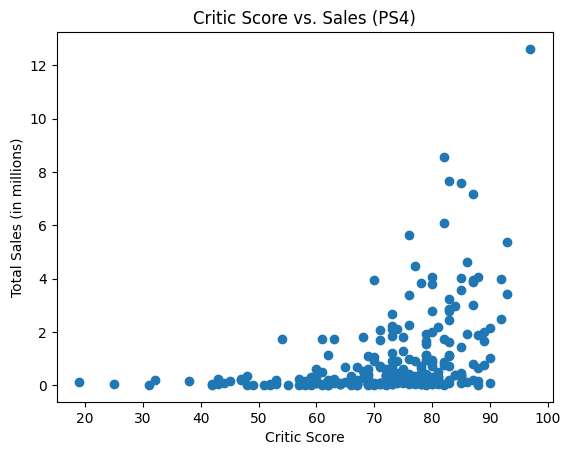

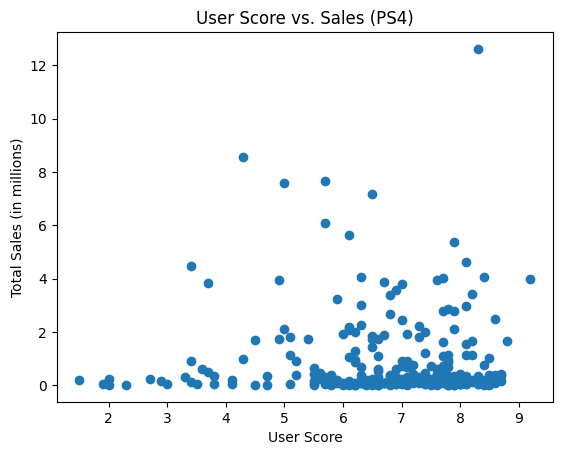

Correlation between Critic Score and Sales for PS4: 0.40656790206178095
Correlation between User Score and Sales for PS4: -0.031957110204556424


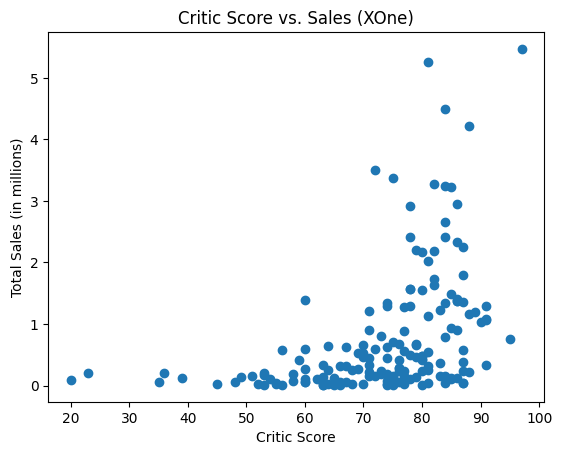

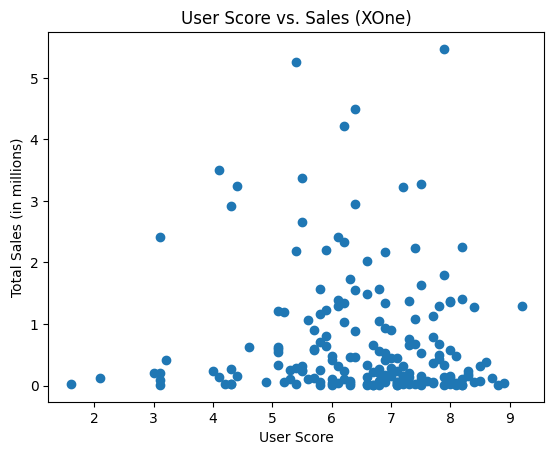

Correlation between Critic Score and Sales for XOne: 0.4169983280084017
Correlation between User Score and Sales for XOne: -0.06892505328279414


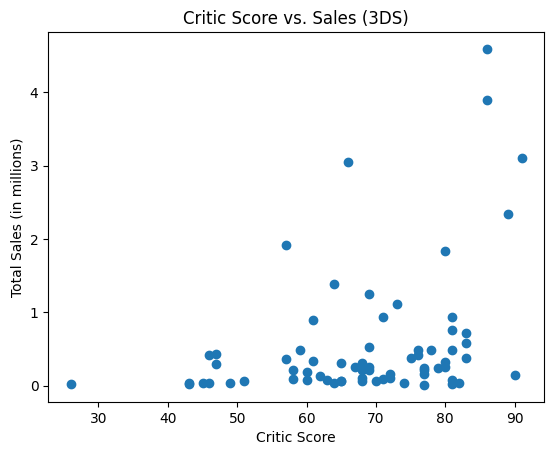

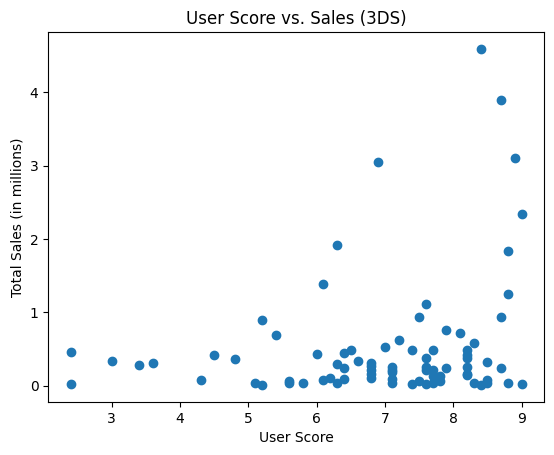

Correlation between Critic Score and Sales for 3DS: 0.3570566142288103
Correlation between User Score and Sales for 3DS: 0.24150411773563016
  Platform  Critic Score Correlation  User Score Correlation
0      PS4                  0.406568               -0.031957
1     XOne                  0.416998               -0.068925
2      3DS                  0.357057                0.241504


In [37]:
# Function to perform analysis for a given platform
def analyze_platform_sales_vs_scores(platform, relevant_data):
    # Filter data for the selected platform and valid scores
    critic_score_data = relevant_data[(relevant_data['platform'] == platform) & 
                                      (relevant_data['critic_score'] != -1)]
    user_score_data = relevant_data[(relevant_data['platform'] == platform) & 
                                    (relevant_data['user_score'] != -1)]

    # Scatter plot for Critic Score vs. Sales
    plt.scatter(critic_score_data['critic_score'], critic_score_data['total_sales'])
    plt.title(f'Critic Score vs. Sales ({platform})')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (in millions)')
    plt.show()

    # Scatter plot for User Score vs. Sales
    plt.scatter(user_score_data['user_score'], user_score_data['total_sales'])
    plt.title(f'User Score vs. Sales ({platform})')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (in millions)')
    plt.show()

    # Calculate correlation coefficients
    correlation_critic = critic_score_data['critic_score'].corr(critic_score_data['total_sales'])
    correlation_user = user_score_data['user_score'].corr(user_score_data['total_sales'])

    print(f"Correlation between Critic Score and Sales for {platform}: {correlation_critic}")
    print(f"Correlation between User Score and Sales for {platform}: {correlation_user}")
    return correlation_critic, correlation_user

# Analyze for PS4
ps4_critic_corr, ps4_user_corr = analyze_platform_sales_vs_scores('PS4', relevant_data)

# Repeat analysis for other platforms (e.g., Xbox One and 3DS)
xbone_critic_corr, xbone_user_corr = analyze_platform_sales_vs_scores('XOne', relevant_data)
switch_critic_corr, switch_user_corr = analyze_platform_sales_vs_scores('3DS', relevant_data)

# Compare results across platforms
platform_comparison = {
    'Platform': ['PS4', 'XOne', '3DS'],
    'Critic Score Correlation': [ps4_critic_corr, xbone_critic_corr, switch_critic_corr],
    'User Score Correlation': [ps4_user_corr, xbone_user_corr, switch_user_corr]
}

# Display comparison results
comparison_df = pd.DataFrame(platform_comparison)
print(comparison_df)


### Observation

- Critic Scores: Across all three platforms, critic scores tend to have a positive correlation with sales. However, the strength of this relationship varies slightly, being strongest for Xbox One and weakest for the 3DS. This suggests that while critical acclaim generally boosts sales, its impact is not uniform across platforms.

- User Scores: The PS4 and Xbox One show a very weak negative correlation between user scores and sales, suggesting that user opinions do not significantly influence sales on these platforms. On the other hand, the 3DS has a noticeable positive correlation between user scores and sales, indicating that user satisfaction is more important for driving sales on this handheld platform.

- Platform Differences: The comparison highlights how different platforms can have varying relationships between scores and sales. Critic scores tend to influence sales more consistently across platforms, while the influence of user scores varies, being more significant on the 3DS.

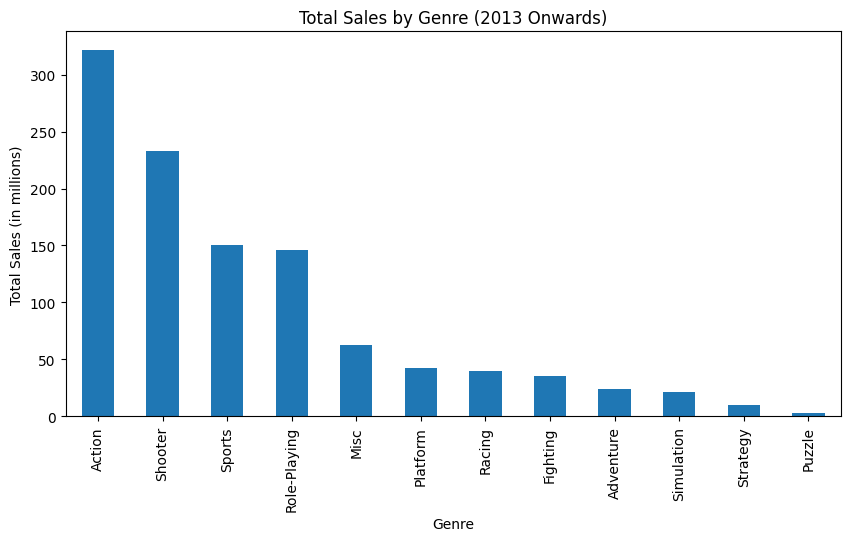

In [38]:
# Group by genre and calculate total sales
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot the distribution of sales by genre
genre_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Genre (2013 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()


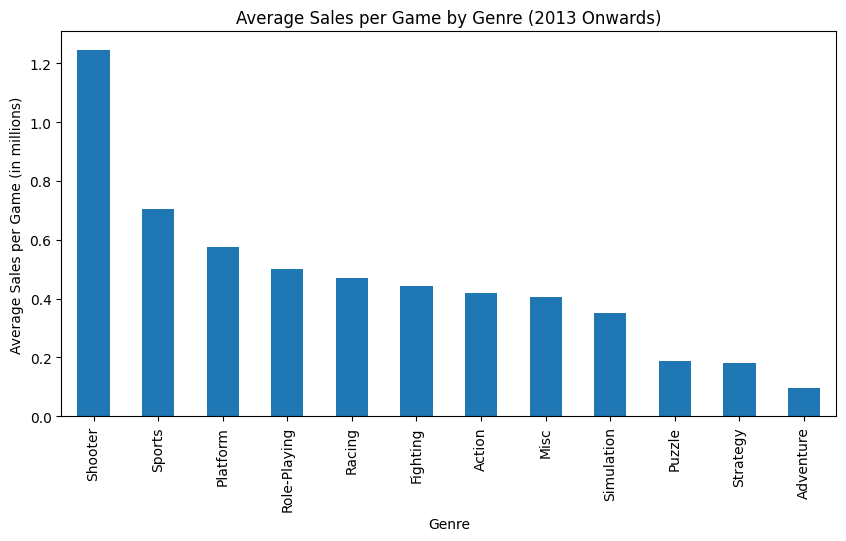

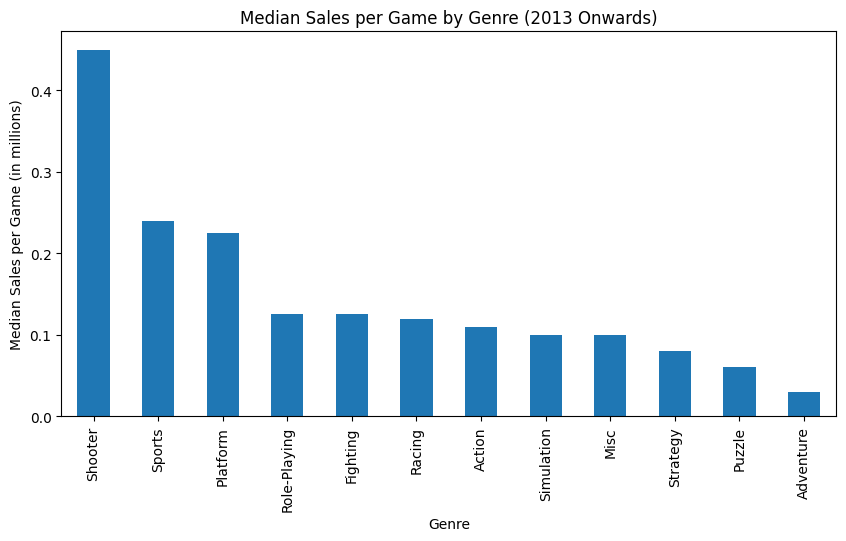

In [39]:
# Calculate the average (mean) sales per game by genre
average_sales_per_game = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plot the distribution of average sales per game by genre
average_sales_per_game.plot(kind='bar', figsize=(10, 5))
plt.title('Average Sales per Game by Genre (2013 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game (in millions)')
plt.show()

# Calculate the median sales per game by genre
median_sales_per_game = relevant_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Plot the distribution of median sales per game by genre
median_sales_per_game.plot(kind='bar', figsize=(10, 5))
plt.title('Median Sales per Game by Genre (2013 Onwards)')
plt.xlabel('Genre')
plt.ylabel('Median Sales per Game (in millions)')
plt.show()


The top genres are Action, Shooter and sports. But when looking at average sales and median sales "shooter" and "sports" sold the most.

### Create a user profile for each region

In [40]:
relevant_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Not Rated,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Not Rated,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [41]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top_platforms_region = relevant_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top Platforms in {region}:\n", top_platforms_region)
    top_genres_region = relevant_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top Genres in {region}:\n", top_genres_region)


Top Platforms in na_sales:
 platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
Top Genres in na_sales:
 genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64
Top Platforms in eu_sales:
 platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
Top Genres in eu_sales:
 genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64
Top Platforms in jp_sales:
 platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64
Top Genres in jp_sales:
 genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


### Observation 

- Regional Preferences: The data highlights significant regional differences in platform and genre preferences. North America and Europe show strong support for home consoles, particularly those from Sony and Microsoft, while Japan prefers handheld consoles, with Nintendo's 3DS leading the market.

- Genre Trends: Action and Shooter genres are consistently popular across NA and EU, reflecting a global trend for these types of games. However, Japan shows a distinct preference for Role-Playing games, which are less popular in Western markets.

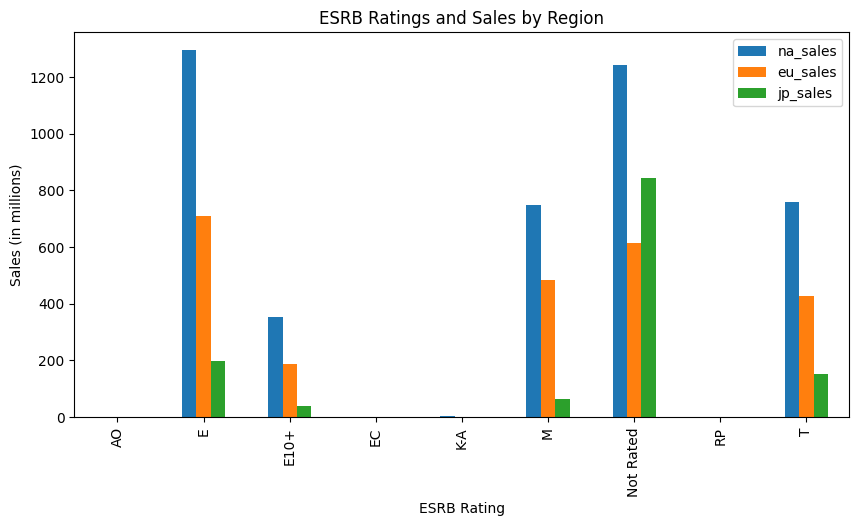

In [42]:
# Examine how different ESRB ratings affect sales in each region.

esrb_sales = games_data.groupby('rating')[regions].sum()
esrb_sales.plot(kind='bar', figsize=(10, 5))
plt.title('ESRB Ratings and Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in millions)')
plt.show()


The ratings affect the sales in all 3 regions.


### Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same. 

- Average user ratings for the Action and Sports genres are different.

In [43]:
# Filter out -1 user scores for Xbox One and PC platforms
xbox_data = games_data[(games_data['platform'] == 'XOne') & (games_data['user_score'] != -1)]['user_score'].dropna()
pc_data = games_data[(games_data['platform'] == 'PC') & (games_data['user_score'] != -1)]['user_score'].dropna()

# Perform t-test between Xbox One and PC user scores
t_stat, p_value = stats.ttest_ind(xbox_data, pc_data, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: -4.653422798410771, P-value: 4.935072360183574e-06


**Null Hypothesis:**
- The null hypothesis asserts that there is no significant difference between the average user scores of games on Xbox One and PC.

**Alternative Hypothesis:**
- The alternative hypothesis posits that there is a significant difference between the average user scores of games on Xbox One and PC. This can be either in the form of one mean being higher or lower than the other.

**Significance Level:** 
- The common significance level chosen for hypothesis testing is 0.05 (5%).


#### Observation

- The t-statistic of −4.653−4.653 indicates the magnitude of the difference between the two group means in terms of standard error units. A negative value suggests that, on average, user scores for Xbox One games are lower than those for PC games.

- The p-value of 4.935×10−64.935×10−6 (which is approximately 0.000005) is far below the standard significance level of 0.05.

<p>Given that the p-value is much lower than 0.05, we reject the null hypothesis. This indicates a statistically significant difference in the user scores between Xbox One and PC games. The negative t-statistic further suggests that games on Xbox One generally have lower user scores compared to PC games, based on the data provided.</p>

In [44]:
# Filter out -1 user scores for Action and Sports genres
action_data = games_data[(games_data['genre'] == 'Action') & (games_data['user_score'] != -1)]['user_score'].dropna()
sports_data = games_data[(games_data['genre'] == 'Sports') & (games_data['user_score'] != -1)]['user_score'].dropna()

# Perform t-test between Action and Sports user scores
t_stat_genres, p_value_genres = stats.ttest_ind(action_data, sports_data, equal_var=False)

print(f"T-statistic: {t_stat_genres}, P-value: {p_value_genres}")


T-statistic: 1.57746791633354, P-value: 0.11483818791498286


**Null Hypothesis:**
- The null hypothesis states that there is no significant difference between the average user scores of games in the Action and Sports genres.

**Alternative Hypothesis:**
- The alternative hypothesis posits that there is a significant difference between the average user scores of Action and Sports games.

**Significance Level:** 
- The standard significance level of 0.05 (5%) is commonly used for hypothesis testing.

#### Observation

- The t-statistic of 1.577 indicates the magnitude and direction of the difference between the two group means in standard error units. A positive t-statistic suggests that, on average, user scores for Action games are higher than those for Sports games.

- The p-value of 0.115 is greater than the significance level of 0.05.

<p>Given that the p-value (0.115) is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that there is a statistically significant difference between the average user scores for Action and Sports games. The observed difference in means could be due to random chance, and the data does not support a significant difference between these two genres in terms of user scores.</p>

## Conclusion

**Platform Lifecycles and Market Trends:**
<p>The lifespan and market presence of gaming platforms have evolved significantly. Older platforms like the WonderSwan, Game Boy, and Nintendo 64 became obsolete as newer technologies and consumer preferences shifted. The PlayStation 2 and Xbox experienced a gradual phase-out as newer generations of consoles took precedence, highlighting a transition period in the market. Handheld devices such as the Nintendo DS and Game Boy Advance demonstrated a longer market relevance, reflecting sustained consumer interest before their decline.</p>

**Sales Performance Across Platforms:**
<p>The box plot analysis of global sales shows that platforms like the Xbox 360, PlayStation 3, and PlayStation 4 achieved higher median sales, indicating strong and consistent performance. Conversely, platforms such as the PSP and PlayStation Vita had lower sales figures, suggesting less market success. Variability in sales across platforms is significant, though a more detailed statistical analysis would be needed to confirm the extent of these differences.</p>

**Impact of Reviews on Sales:**
<p>For the PlayStation 4, critic scores show a moderate positive correlation with sales, indicating that higher critic ratings tend to boost sales. However, user scores exhibit almost no correlation with sales, suggesting that user reviews are less influential on commercial success compared to professional reviews. Other factors such as marketing and brand recognition likely play a more substantial role in determining sales performance.</p>

**Regional Market Preferences:**
<p>Regional differences are evident in platform and genre preferences. North America shows strong support for Xbox and Wii, Europe favors PlayStation platforms, and Japan exhibits a preference for handheld and domestic consoles like the DS. Genre preferences also vary, with Action and Sports genres dominating Western markets, while Japan shows a stronger inclination towards Role-Playing games. These variations reflect regional cultural influences and market strategies.</p>

**Statistical Analysis Results:**
<p>Statistical tests confirm that there is no significant difference in user scores between Action and Sports games. However, there is a statistically significant difference between user scores for Xbox One and PC games, with Xbox One games generally receiving lower user scores compared to PC games.</p>

**Promising Platforms:**

- PlayStation 4 (PS4): Continues to dominate in both North American and European markets with strong sales and consistent performance.
    
- Xbox One (XOne): Although it trails behind the PS4, it maintains a strong presence in North America and shows potential for continued market relevance.
    
- Nintendo 3DS (3DS): Particularly promising in Japan, the 3DS highlights the continued demand for handheld gaming devices in certain regions.

**Final Conclusion:**
<p>The gaming industry is characterized by diverse trends in platform life cycles, sales performance, and regional preferences. While critic reviews positively impact sales, user scores do not significantly influence commercial success. Understanding regional preferences and the multifaceted nature of factors driving sales is crucial for industry success. The promising platforms identified offer insights into future market opportunities, with a focus on platforms that maintain strong regional sales and appeal to consumer preferences.</p>
